# Setup

In [1]:
!pip install ultralytics --quiet
!pip install roboflow --quiet
!pip install torch torchvision onnx onnx2keras tensorflow --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 782.8/782.8 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.2 MB/s eta 0:00:00
Reason for being yanked: deprecated, use 4.8.0.76
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 49.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.35 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.5/78.2 GB disk)


In [3]:
from ultralytics import YOLO
from IPython.display import display, Image
import shutil
from google.colab import files
import torch
import os
import onnx
from onnx2keras import onnx_to_keras
from roboflow import Roboflow

In [4]:
HOME = os.getcwd()
print(HOME)

/content


# Data

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

/content/datasets


In [6]:
rf = Roboflow(api_key="omDBjHRrb9UFDvmRW9cb")
project = rf.workspace("dataset-jerawat").project("capstone-bjc8v")
version = project.version(12)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.35, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Capstone-12 in yolov8:: 100%|██████████| 1972/1972 [00:01<00:00, 1878.37it/s]


# training

In [7]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=1024 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 207MB/s]
Ultralytics YOLOv8.2.35 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Capstone-12/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=1024, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=

In [8]:
!ls {HOME}/runs/detect/train/

args.yaml					   R_curve.png		val_batch0_labels.jpg
confusion_matrix_normalized.png			   results.csv		val_batch0_pred.jpg
confusion_matrix.png				   results.png		val_batch1_labels.jpg
events.out.tfevents.1718720681.14f038db5a78.934.0  train_batch0.jpg	val_batch1_pred.jpg
F1_curve.png					   train_batch1.jpg	val_batch2_labels.jpg
labels_correlogram.jpg				   train_batch2000.jpg	val_batch2_pred.jpg
labels.jpg					   train_batch2001.jpg	weights
P_curve.png					   train_batch2002.jpg
PR_curve.png					   train_batch2.jpg


/content


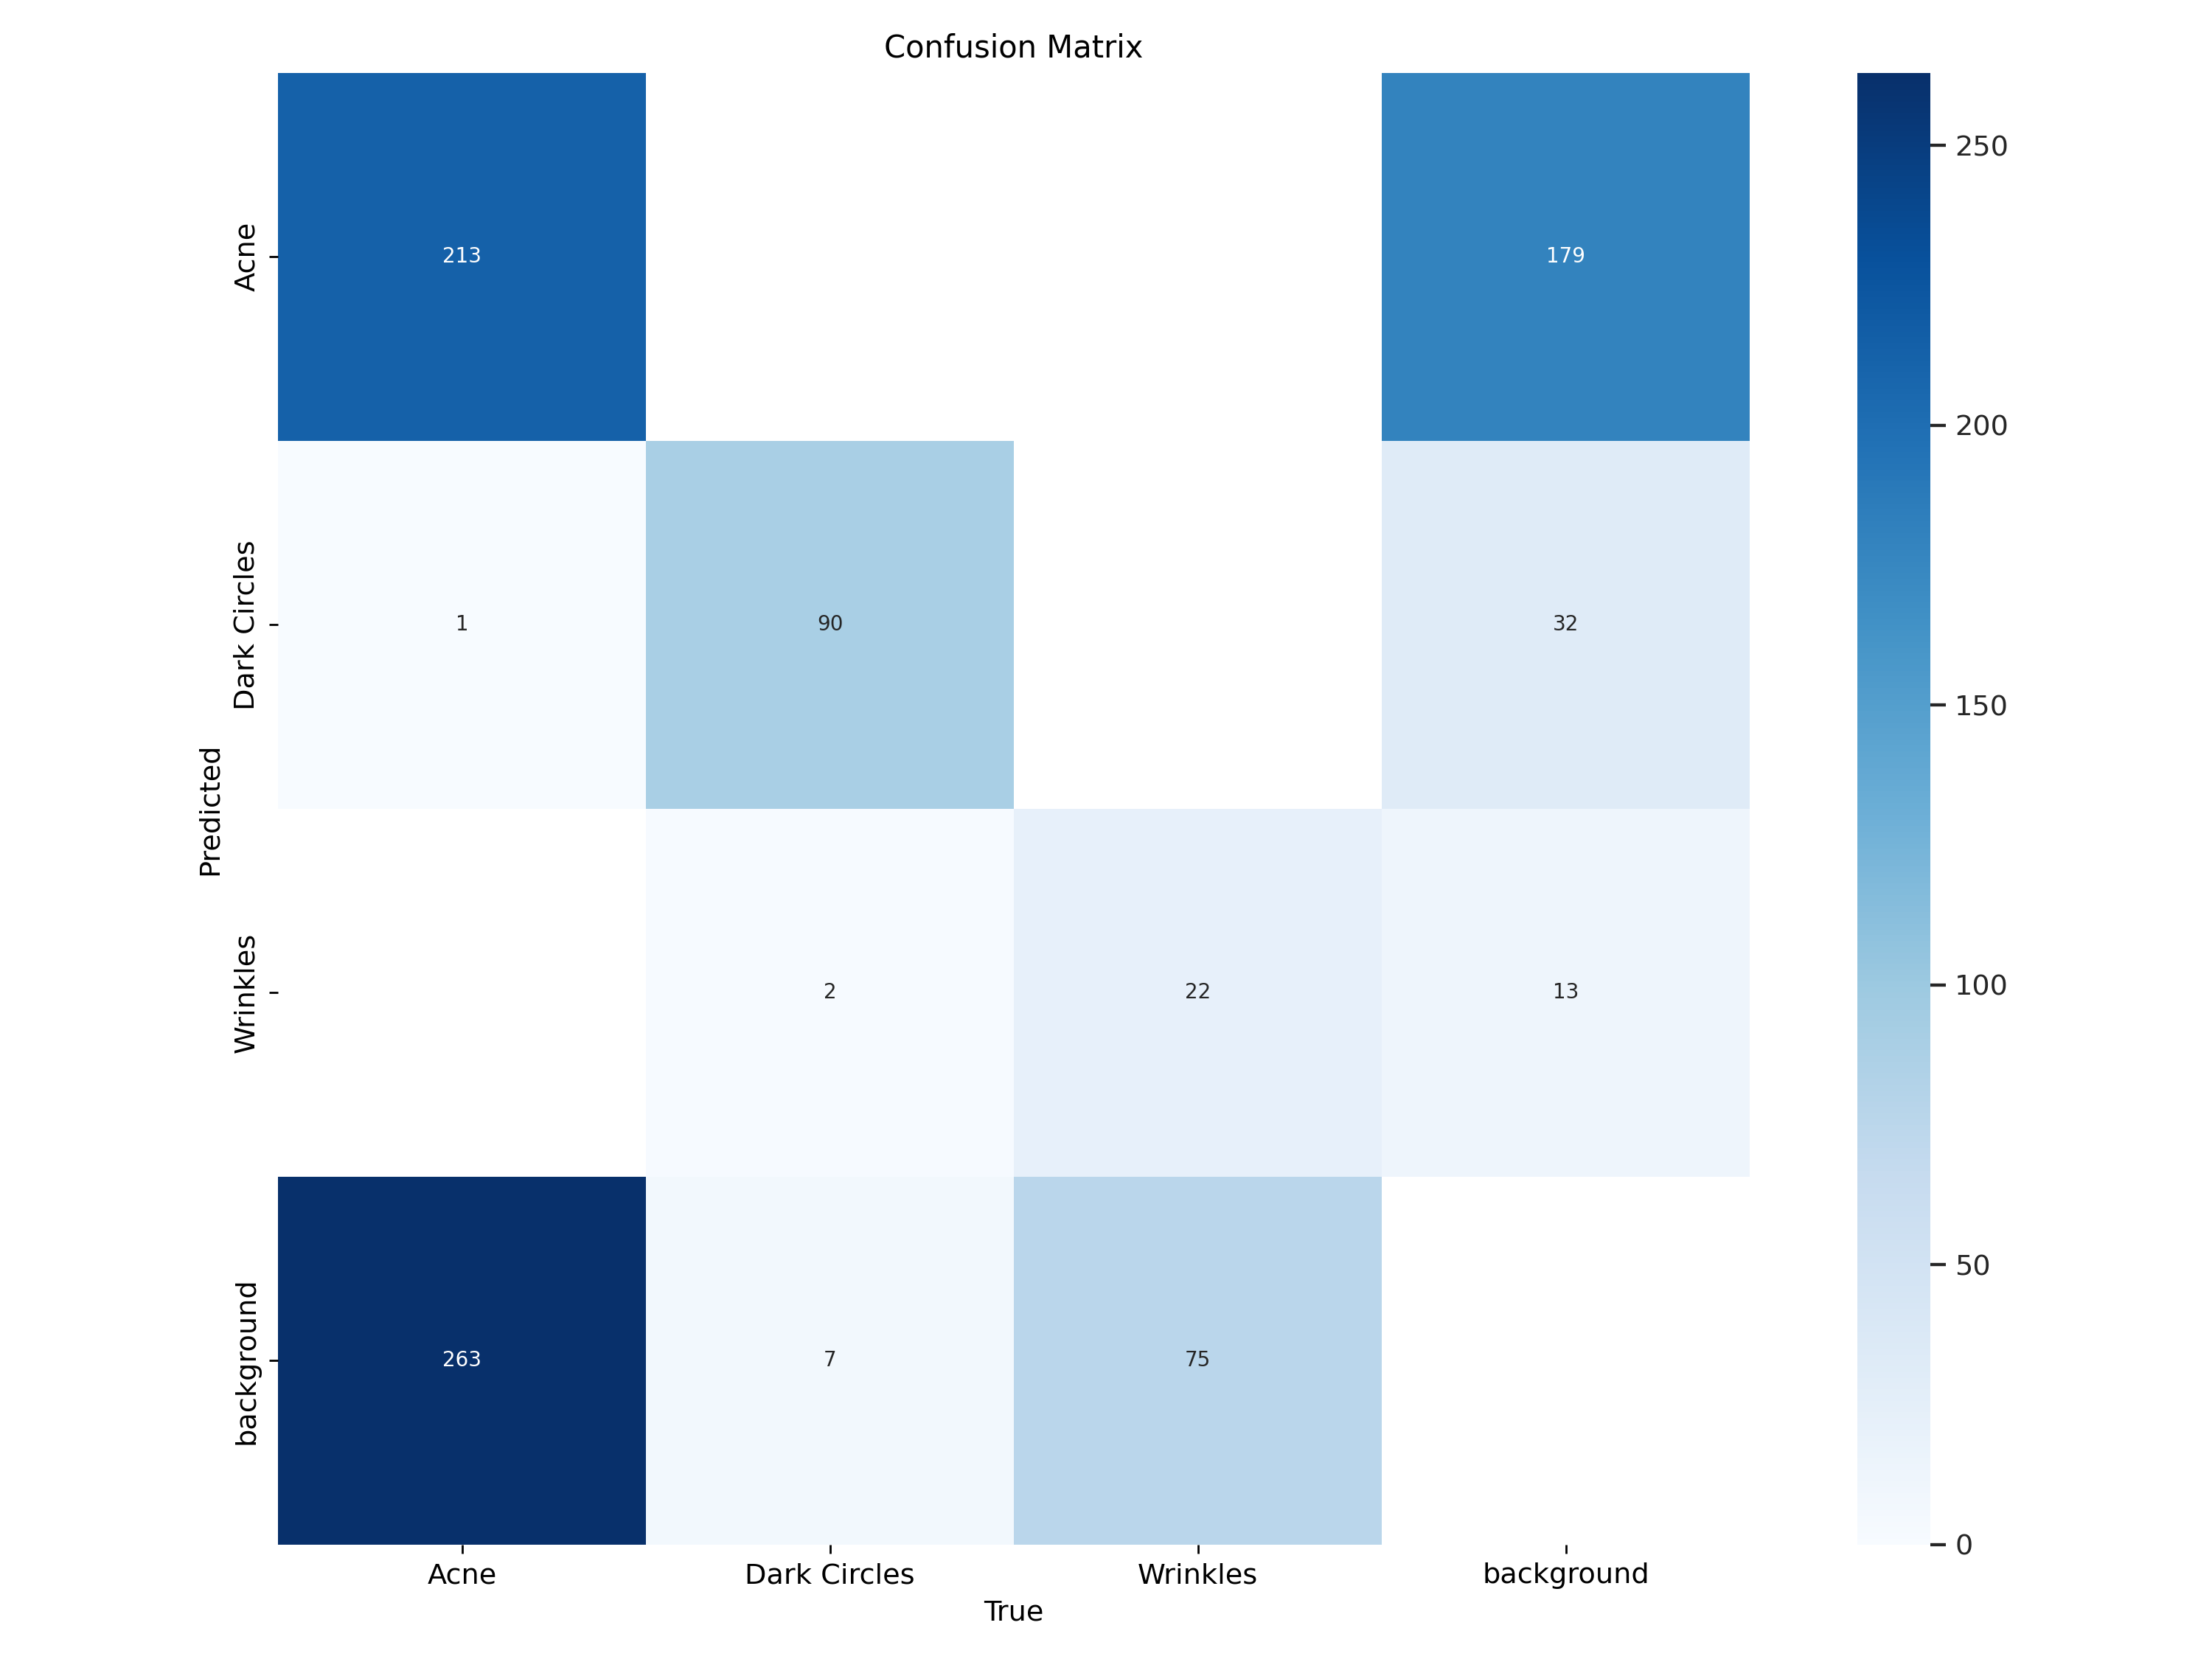

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

In [10]:
# data validasi
%cd {HOME}
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.35 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Capstone-12/valid/labels.cache... 96 images, 0 backgrounds, 0 corrupt: 100% 96/96 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 19, len(boxes) = 673. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 6/6 [00:09<00:00,  1.55s/it]
                   all         96        673      0.528      0.528      0.502      0.195
                  Acne         41        477      0.477       0.47      0.424      0.143
          Dark Circles         58         99      0.689      0.889      0.849      0.365
              Wrinkles        

In [11]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.2.35 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

image 1/96 /content/datasets/Capstone-12/test/images/04833_png_jpg.rf.29ee5c80c5aec07ec6b828833b94d5e6.jpg: 1024x1024 5 Wrinkless, 32.5ms
image 2/96 /content/datasets/Capstone-12/test/images/05844_png_jpg.rf.19793b4118a36ad83fb754364ee46f1e.jpg: 1024x1024 3 Wrinkless, 32.6ms
image 3/96 /content/datasets/Capstone-12/test/images/06764_png_jpg.rf.cdf079a084fceccc93e279998e06fc9e.jpg: 1024x1024 4 Wrinkless, 32.5ms
image 4/96 /content/datasets/Capstone-12/test/images/105_jpg.rf.fdbb4425709236717e814e854d280150.jpg: 1024x1024 1 Acne, 1 Dark Circles, 32.5ms
image 5/96 /content/datasets/Capstone-12/test/images/106_jpg.rf.3159aec33b574297403c2aceeb01ebeb.jpg: 1024x1024 1 Dark Circles, 32.5ms
image 6/96 /content/datasets/Capstone-12/test/images/107_jpg.rf.e0391272b1a3c328832ae8436d011eb7.jpg: 1024x1024 4 Acnes, 1 Dark Ci

/content


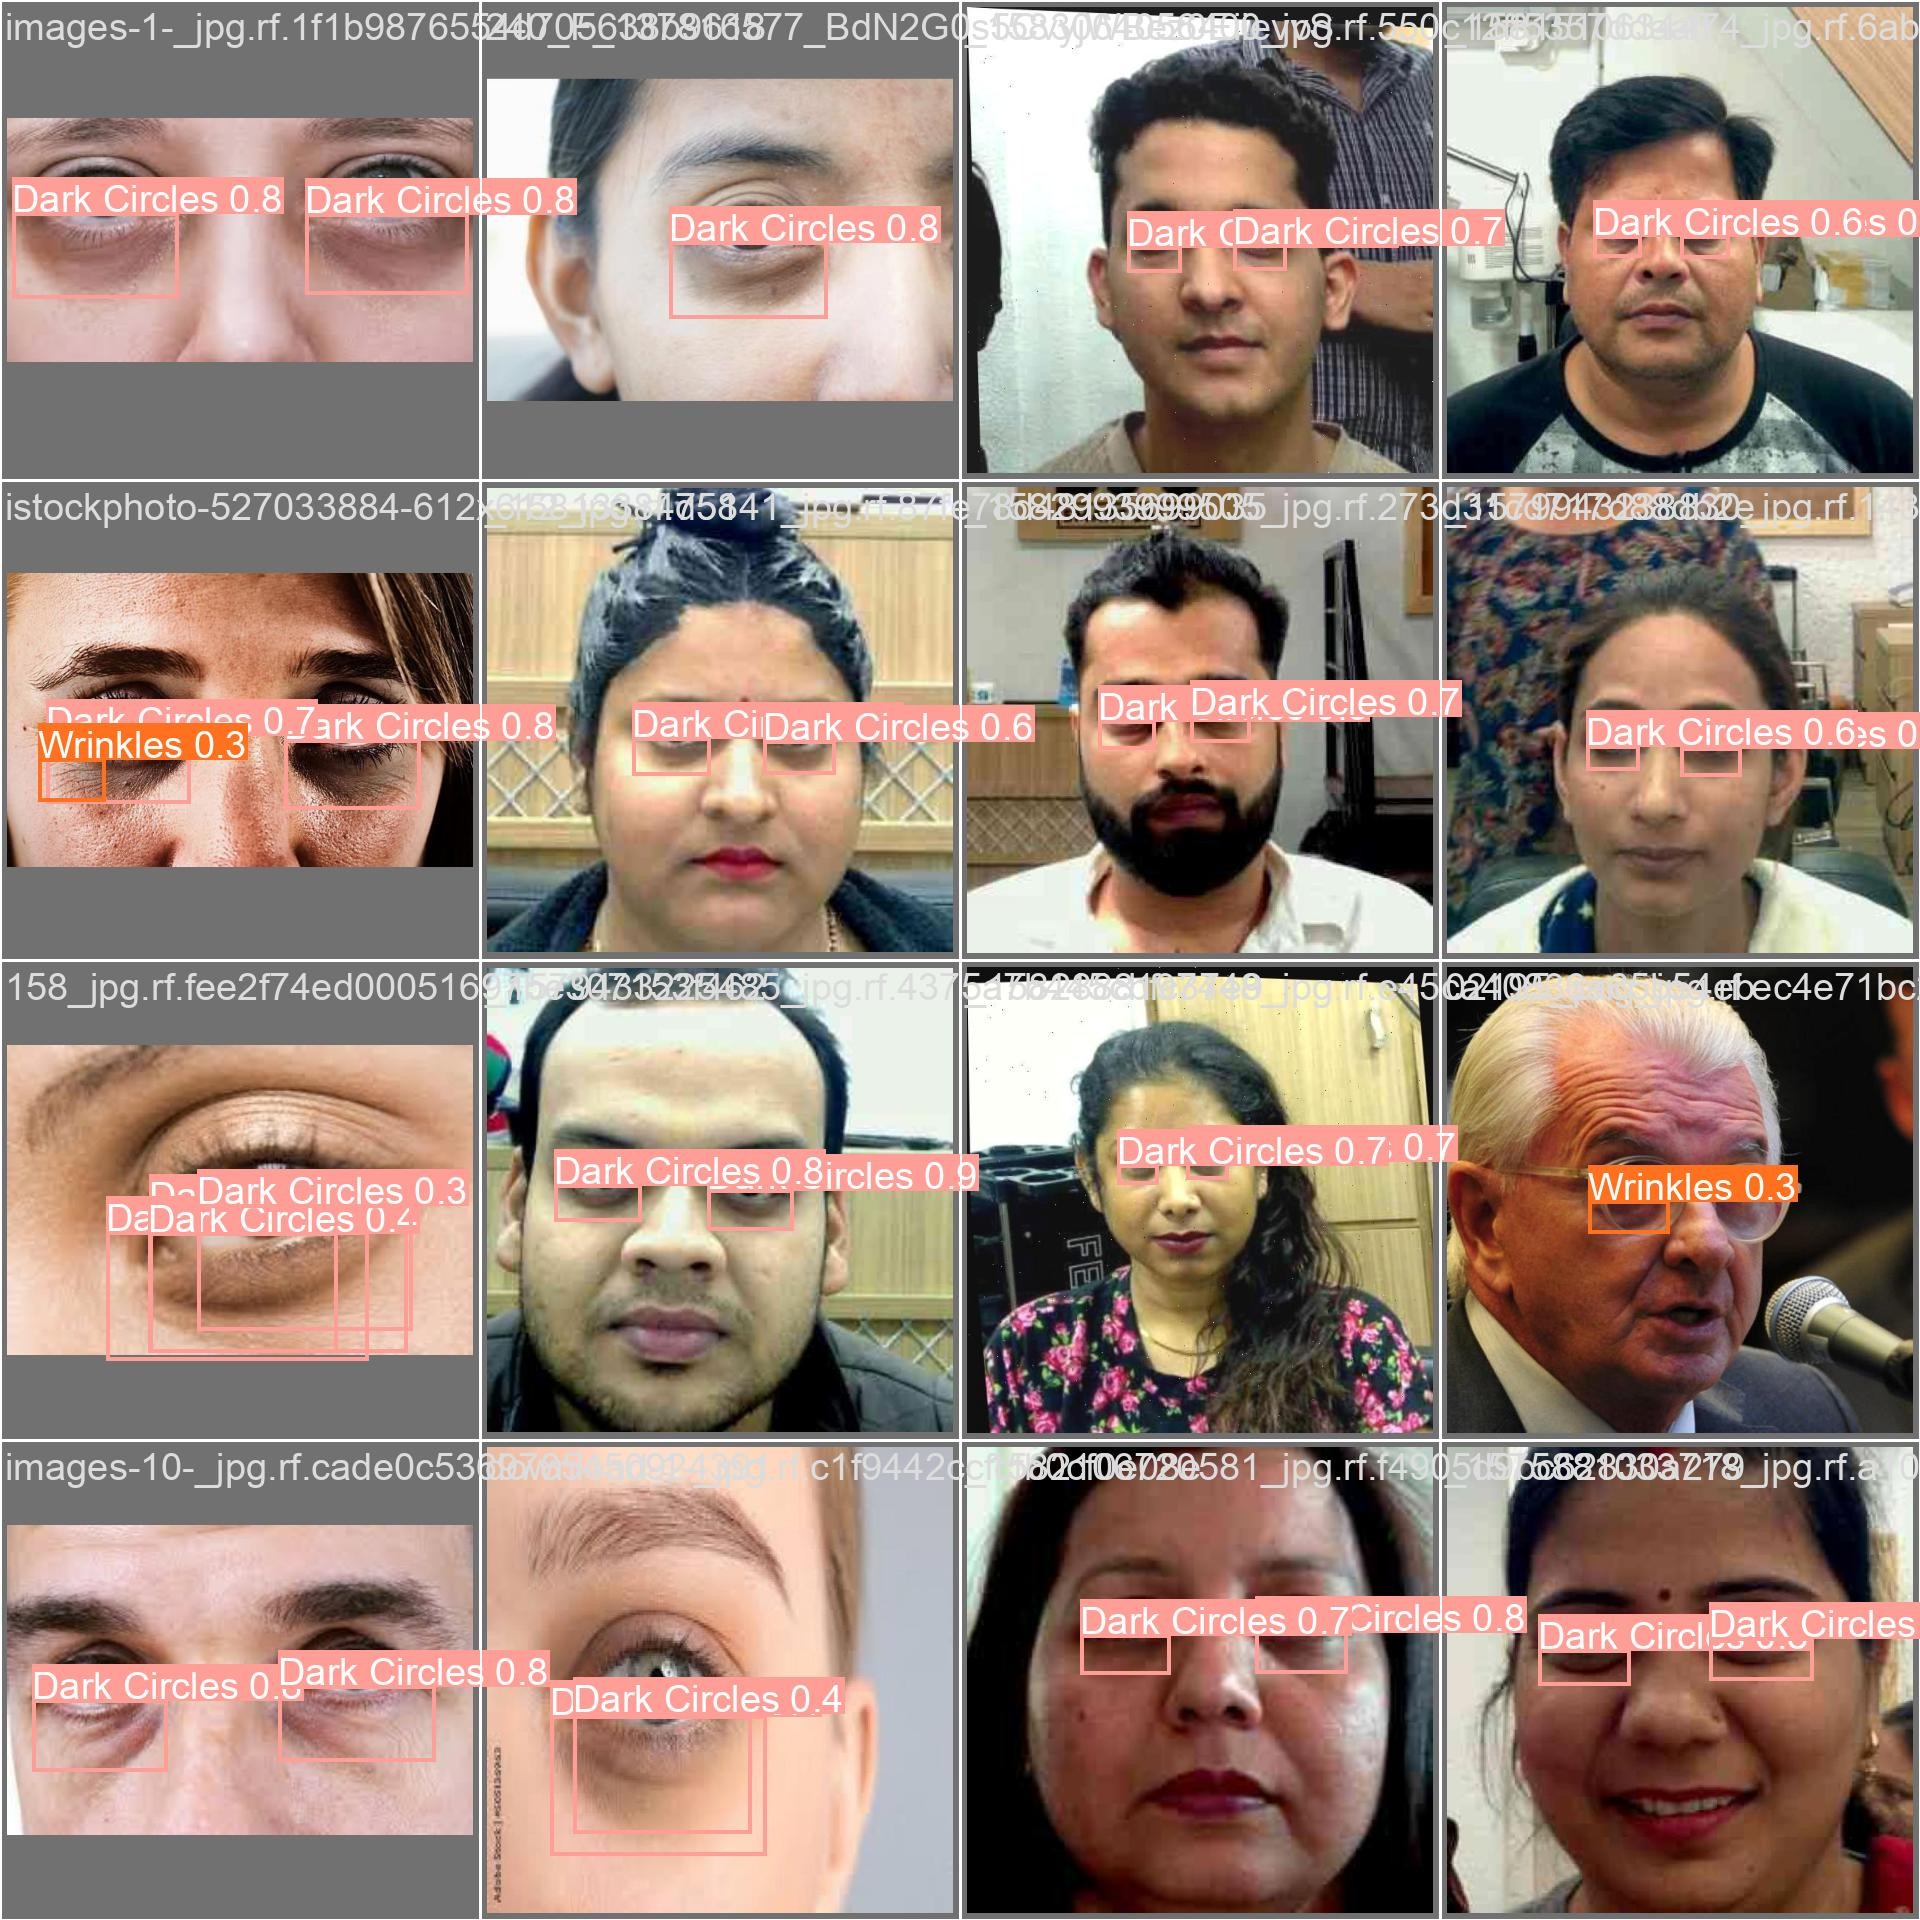

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Export

In [13]:
folder_path = '/content/runs/detect/train/'
zip_path = '/content/V12M4_50_1024.zip'
shutil.make_archive(zip_path.replace('.zip', ''), 'zip', folder_path)
files.download(zip_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
best_model_path = 'runs/detect/train/weights/best.pt'
shutil.copy(best_model_path, 'V12M4_50_1024.pt')
files.download('V12M4_50_1024.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>